In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

Index(['Date', 'MSFT', 'MU', 'INTC', 'XOM', 'GE', 'CVX', 'C', 'BAC', 'JPM',
       'DIS'],
      dtype='object')
Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.505 Seconds
Building M ...
	Done. Took 0.561 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 233.778
	Done. Took 3.814 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) MSFT <-- MU: 0.265*(-0.097)^t + 6.255*(-0.131)^t + -4.053*(-0.186)^t + -4.725*(-0.123)^t + 2.258869 * delta(t,0)
		RMSE = 0.096
		Matlab: [ 0.27 -0.1   6.25 -0.13 -4.05 -0.19 -4.73 -0.12]
	Done. Took 4.012 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) MSFT <-- INTC: -0.254*(-0.060)^t + 4.128*(0.186)^t + -8.242*(-0.045)^t + -0.527*(0.418)^t + 4.894099 * delta(t,0)
		RMSE = 0.030
		Matlab: [-0.25 -0.06  4.13  0.19 -8.24 -0.04 -0.53  0.42]
	Done. Took 11.414 Seconds
Learning Convolution for Q(2,

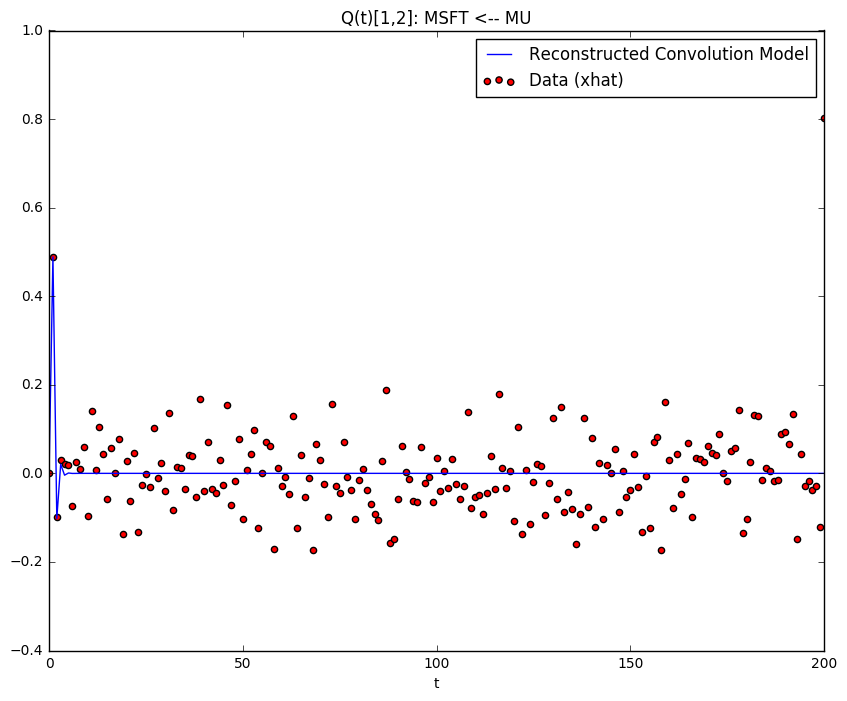

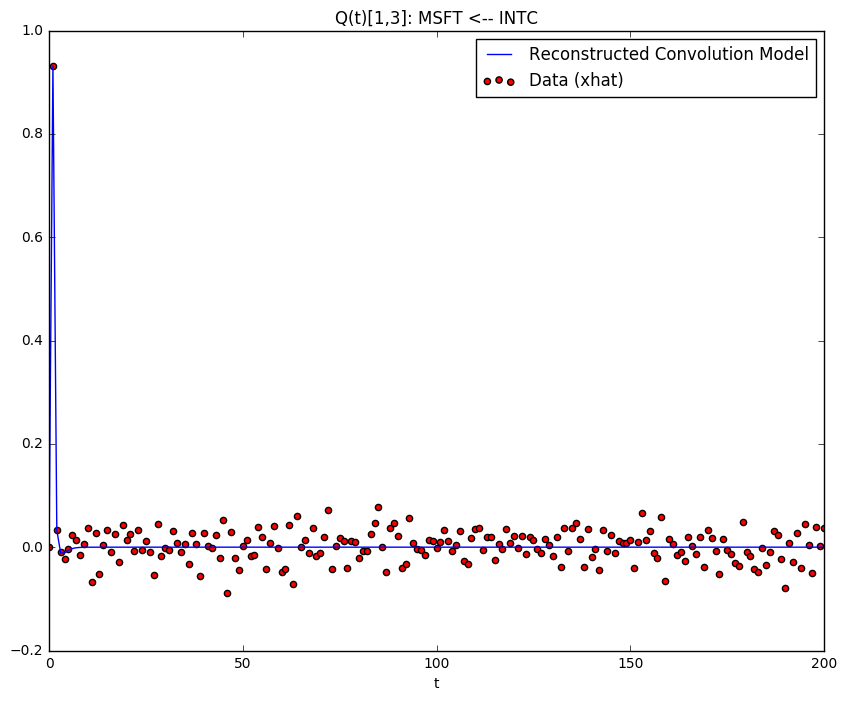

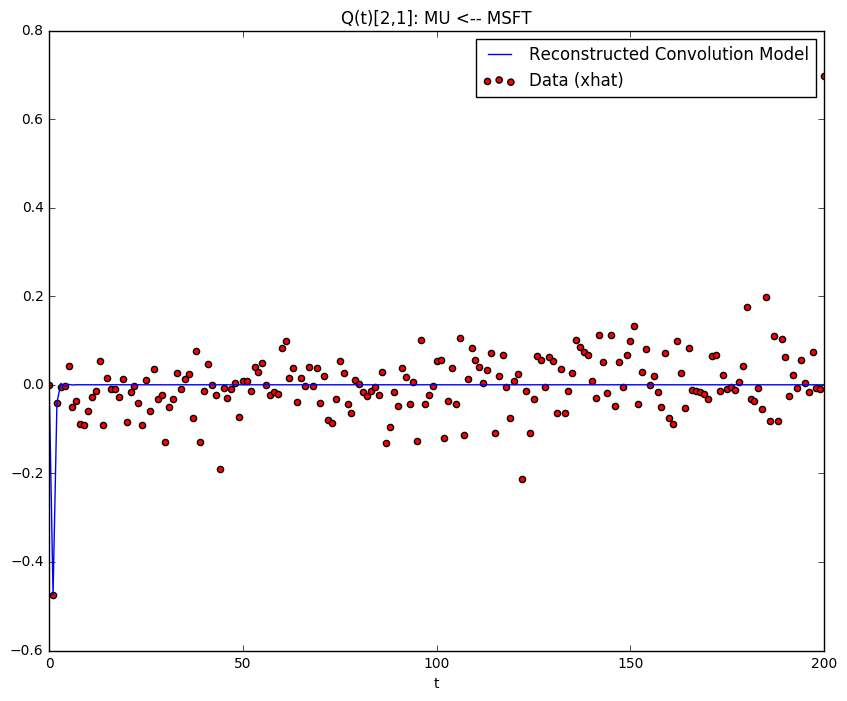

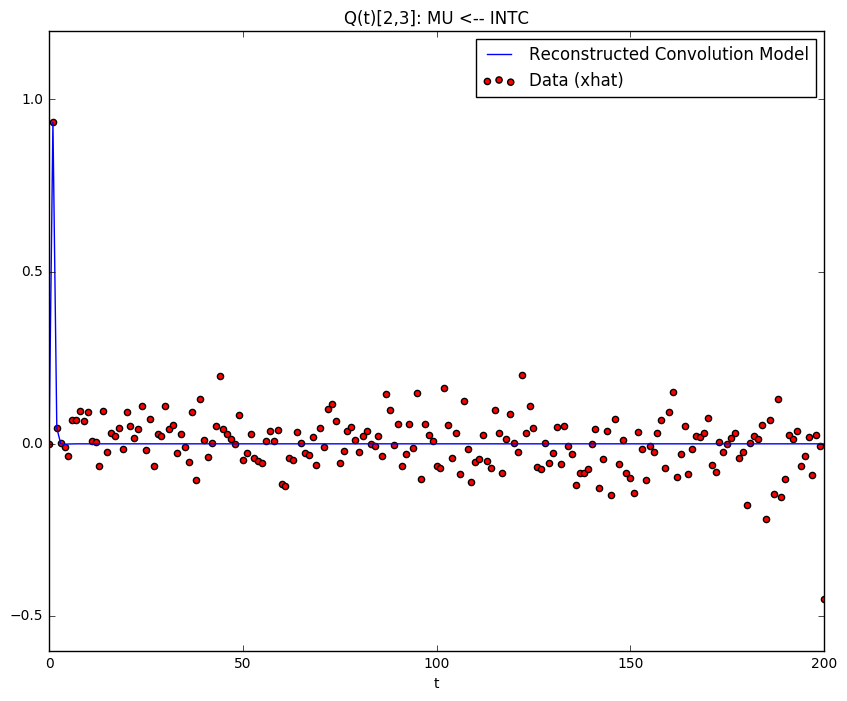

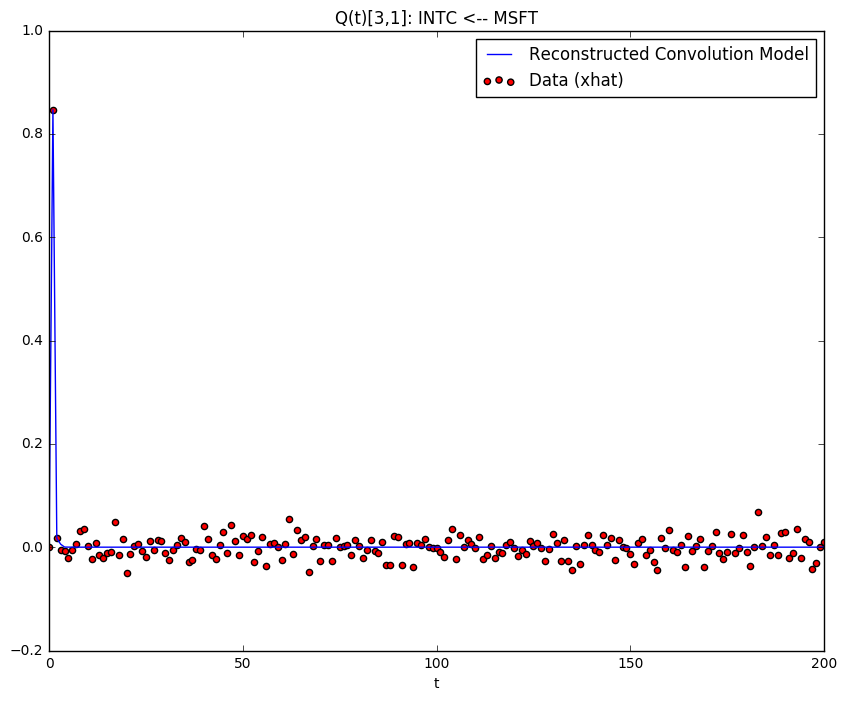

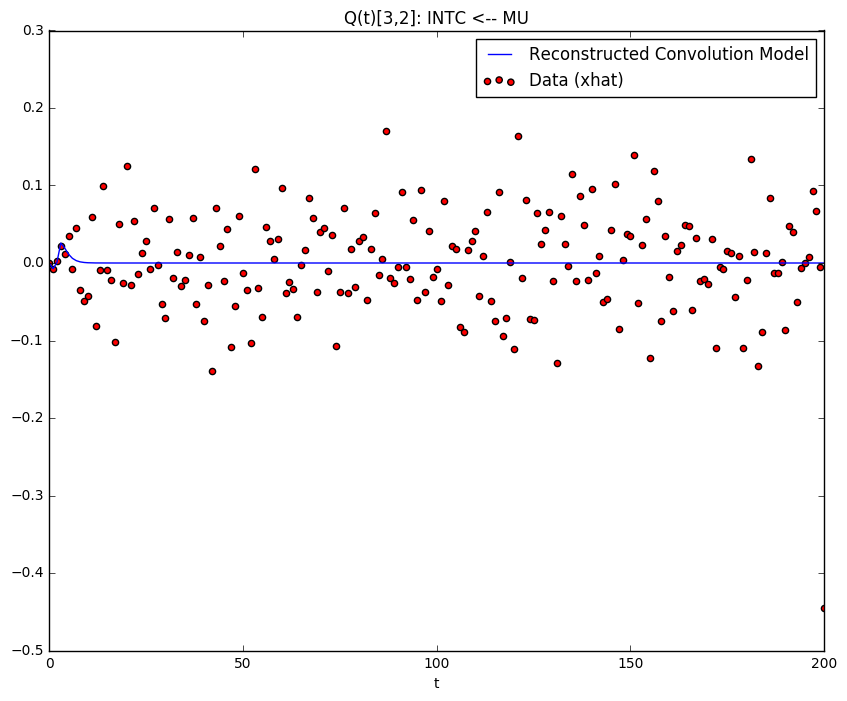

In [3]:
%matplotlib inline
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
print(y.columns)
cols = [col for col in y.columns if col != 'Date']
cols = ['MSFT', 'MU', 'INTC']
y = y[cols].values
securities = cols

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [4]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([0.265057105229 -0.0973439599926 6.25451062246 -0.131166034404 -4.05314555545 -0.186390831191 -4.72529129215 -0.122610319587 ; -0.253770704605 -0.059720003979 4.12839109888 0.185822280979 -8.24164529778 -0.0448237124308 -0.527074030568 0.418190964623 ; -0.18796683318 -0.349721486908 4.87227363534 -0.0795898917547 -0.418149502465 -0.186254622977 -1.5439857094 0.149101760992 ; -3.18425122812 0.199820324826 9.71179163001 0.138054352972 -5.31536485858 -0.0486708199363 1.29187687606 -0.023230480487 ; 3.19413224248 -0.0693980657532 -8.33827867883 -0.0705284742059 3.32139300116 0.0898023784116 2.04497708629 0.0889537009128 ; -1.35901811023 -0.034143786412 -2.70616665943 -0.0324080302067 0.995965905514 0.452181435217 -1.76580278952 0.335187845301], {'MSFT', 'MU', 'INTC'});


In [9]:
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)

print(y['Date'].min())
print(y['Date'].max())

2012-01-06
2016-10-13


Index(['Date', 'MSFT', 'MU', 'INTC', 'XOM', 'GE', 'CVX', 'C', 'BAC', 'JPM',
       'DIS'],
      dtype='object')
Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.538 Seconds
Building M ...
	Done. Took 0.458 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 0.869 Seconds
Extracting Qis ...
	Done. Took 0.002 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) MSFT <-- MU: 0.607*(0.139)^t + 0.126*(0.173)^t + -1.429*(-0.049)^t + -5.646*(-0.047)^t + 6.342556 * delta(t,0)
		RMSE = 0.049
		Matlab: [ 0.61  0.14  0.13  0.17 -1.43 -0.05 -5.65 -0.05]
	Done. Took 5.501 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) MSFT <-- INTC: -3.730*(-0.041)^t + 0.051*(0.004)^t + 8.358*(0.047)^t + -5.257*(-0.048)^t + 0.577130 * delta(t,0)
		RMSE = 0.008
		Matlab: [-3.73 -0.04  0.05  0.    8.36  0.05 -5.26 -0.05]
	Done. Took 15.710 Seconds
Learning Convolution for Q(2,1) ...

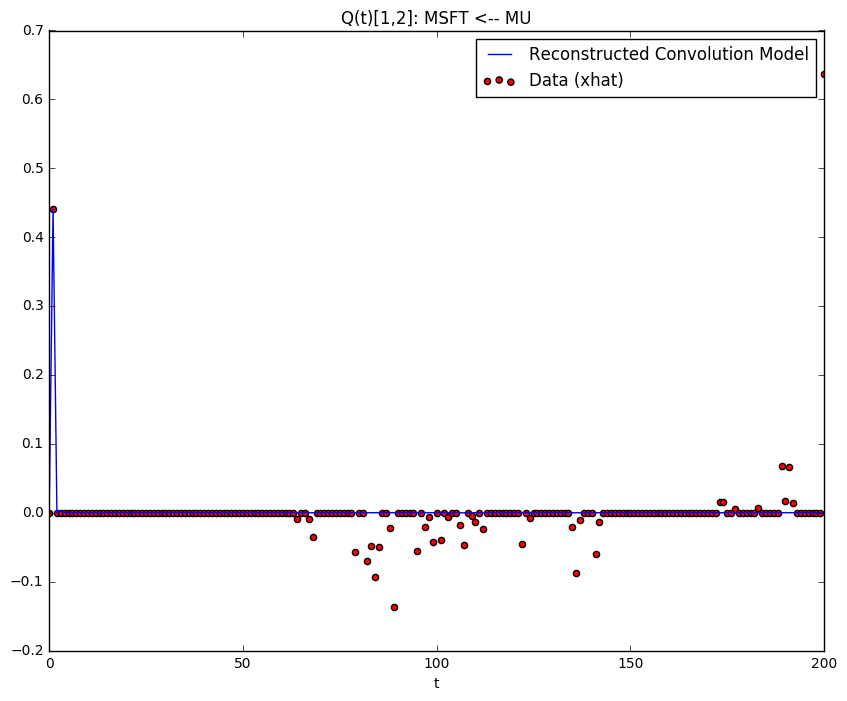

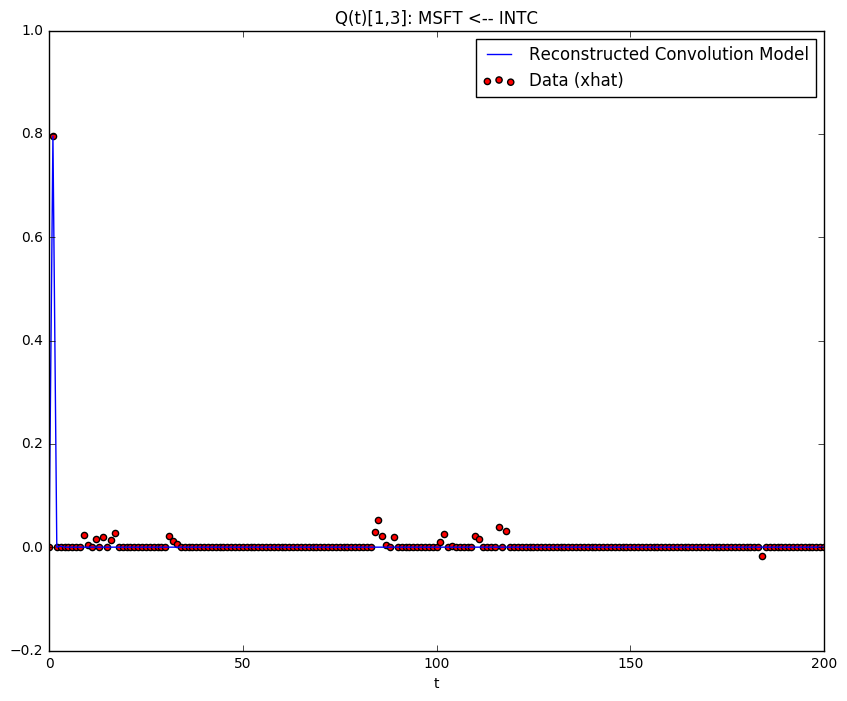

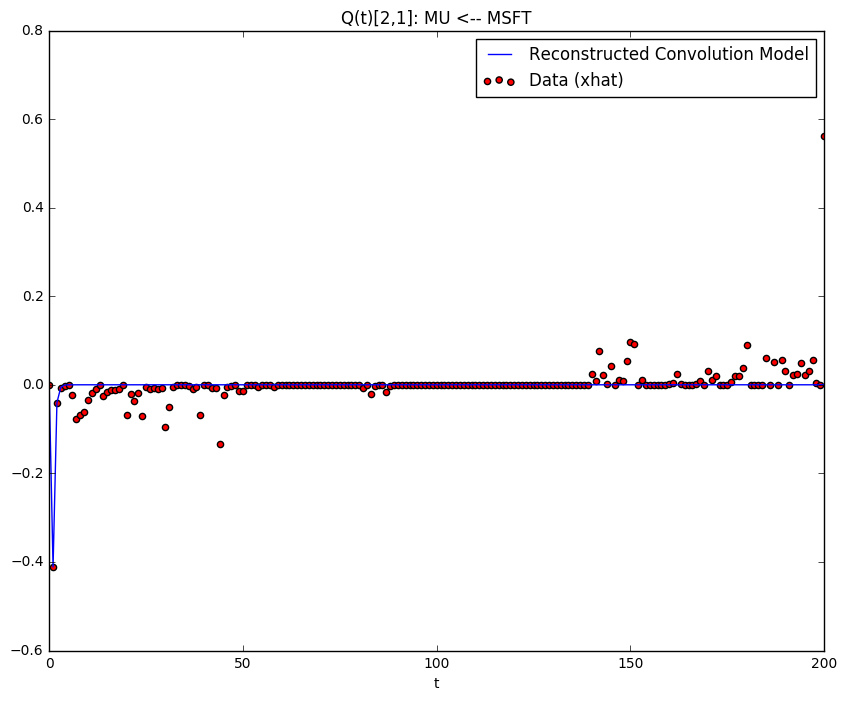

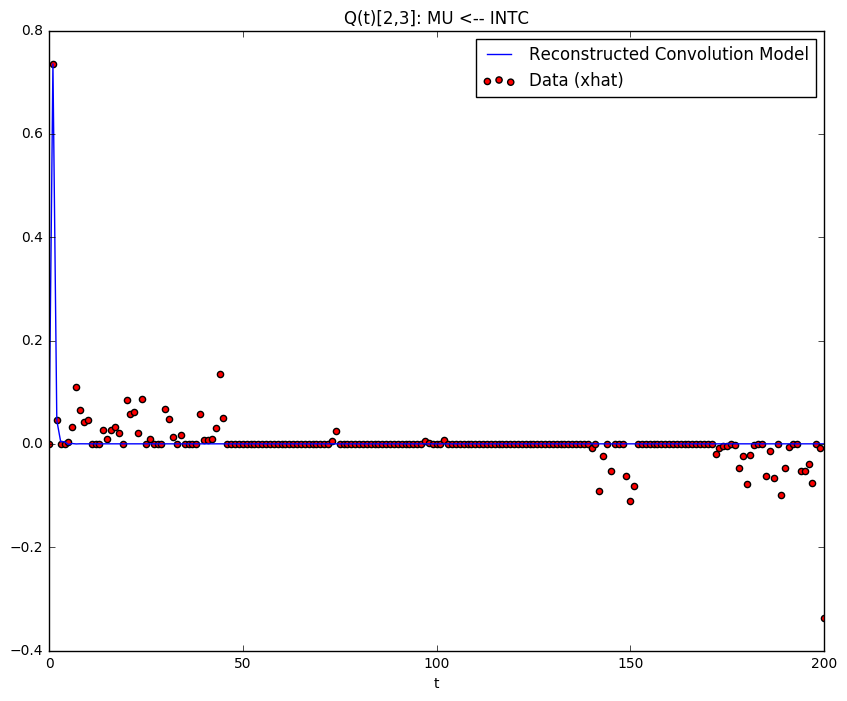

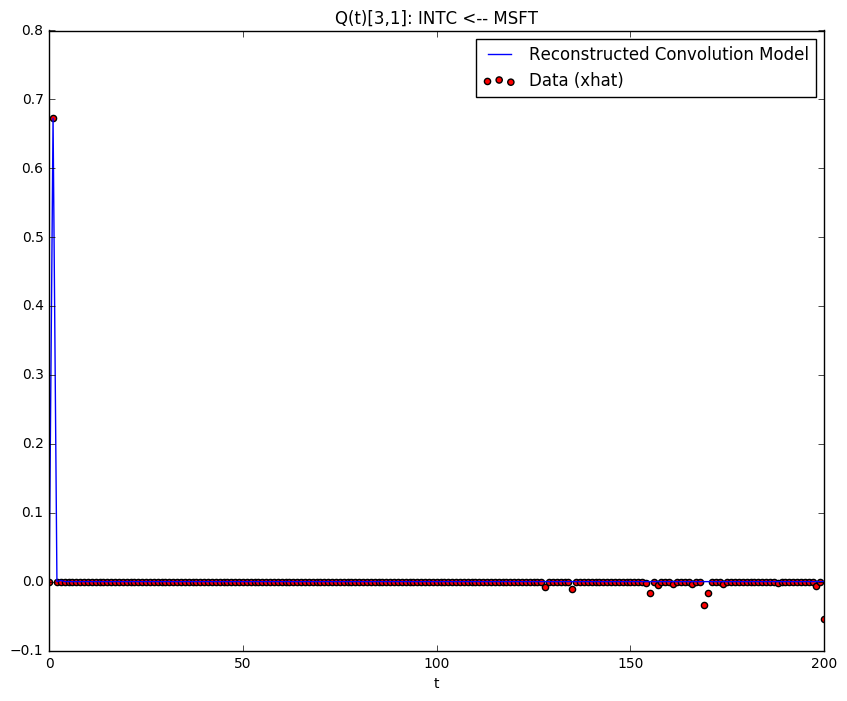

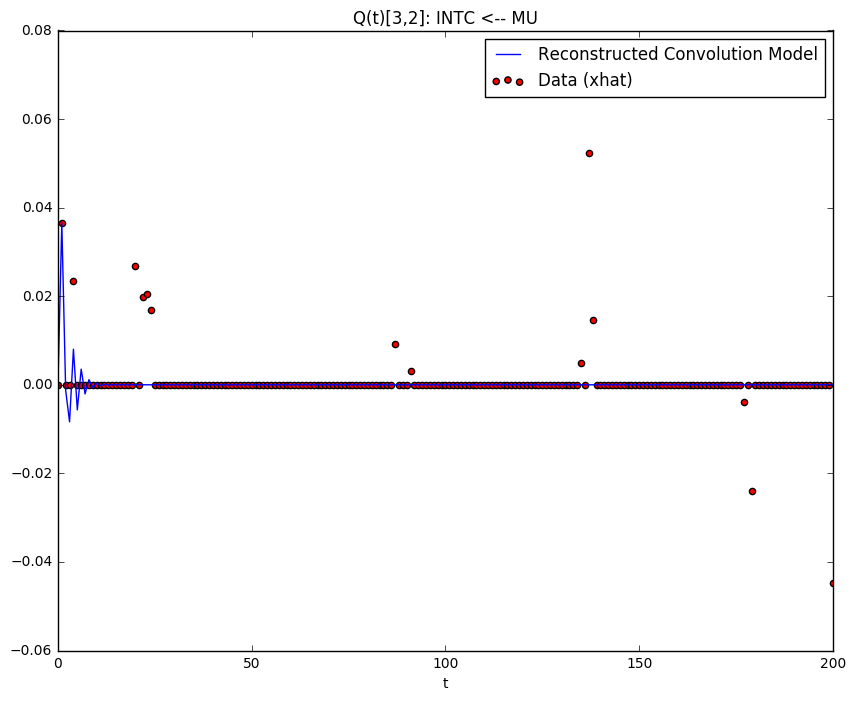

In [2]:
%matplotlib inline
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
print(y.columns)
cols = [col for col in y.columns if col != 'Date']
cols = ['MSFT', 'MU', 'INTC']
y = y[cols].values
securities = cols

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=True)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [3]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([0.606800368878 0.139409977545 0.12556948488 0.172886534662 -1.42911063691 -0.0494734458164 -5.6458156734 -0.0467469732686 ; -3.72981170284 -0.0410577336302 0.0511205161805 0.00362961849321 8.35824326576 0.0467818425728 -5.25668237976 -0.0477980520082 ; -2.87042070903 0.0769948321122 -8.07235917105 -0.0307856915334 -1.60450270264 0.13326552285 3.93686730868 -0.0571529429786 ; -1.13820491757 -0.129691548224 0.168193195454 -0.387316198563 -1.16364695168 -0.141771049802 3.79991281045 0.128386481195 ; 7.99386685125 0.0415518675793 -1.9915588163 -0.0591906772716 -3.24731969635 -0.0539682319449 0.833612455755 0.0565630296605 ; -0.838318055729 0.0091410564997 -0.809722829027 -0.43511721921 0.196305867734 -0.494681295118 0.427971806898 -0.493068674316], {'MSFT', 'MU', 'INTC'});


In [5]:
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
print(len(y))

1201
